# Visualizations and Graphs


In [1]:
import tensorflow as tf
import tensorboard as tb
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [2]:
def get_data_tags(file_path):
    data_tags = []
    for e in tf.train.summary_iterator(file_path):
        for v in e.summary.value:
            if v.tag not in data_tags:
                data_tags.append(v.tag)
            else:
                break
    return data_tags

def get_data_tb(file_path, data_tag):
    data_list = []
    step_list = []
    
    for e in tf.train.summary_iterator(file_path):
        for v in e.summary.value:
            if v.tag == data_tag:
                data_list.append(v.simple_value)
                step_list.append(e.step)
        
    return data_list, step_list

def get_data_list(exp_name, data_tag):
    path = get_path(exp_name)
    return get_data_tb(path, data_tag)

def get_path(exp_name):
    tf_event_file = os.listdir(os.path.join('data', exp_name, 'tb'))[0]
    return os.path.join('data', exp_name, 'tb', tf_event_file)
    
def get_experiments(level, exclude=' '):
    return [s for s in os.listdir('data') if level in s and exclude not in s]

def get_plot(plot_list, x_data=None, title='', xlabel='', ylabel='', xlims=None, ylims=None):

    plt.rcParams["figure.figsize"] = (10,5)
    
    fig, ax = plt.subplots()
    
    for item in plot_list:
        
        y_data,_ = get_data_list(item[0], item[1])
        
        try:
            label = item[2]
        except:
            label = ' '
        
        if x_data is not None:
            x_values,_ = get_data_list(item[0], x_data)
            ax.plot(x_values, y_data, label=label)
        else:
            ax.plot(y_data, label=label)
            
    
    ax.legend(shadow=True, fontsize='large')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if xlims is not None:
        plt.xlim(xlims)
    if ylims is not None:
        plt.ylim(ylims)
    
    
    plt.title(title)
    plt.show()
    


### A2C - Basic

In [3]:
file_path = 'data/a2c_basic_t3m/tb/events.out.tfevents.1561485886.n-62-20-10'

In [4]:
fpath = get_path('a2c_basic_t3m')
get_data_tags(fpath)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


['model/fps',
 'model/total_loss',
 'model/critic_loss',
 'model/policy_loss',
 'model/entropy',
 'episode_means/reward',
 'episode_means/length',
 'game_variables/accuracy',
 'game_variables/ammo_gained',
 'game_variables/ammo_lost',
 'game_variables/hits_given',
 'game_variables/hits_taken',
 'game_variables/health_gained',
 'game_variables/health_lost',
 'game_variables/deaths',
 'game_variables/frags',
 'game_variables/kills']

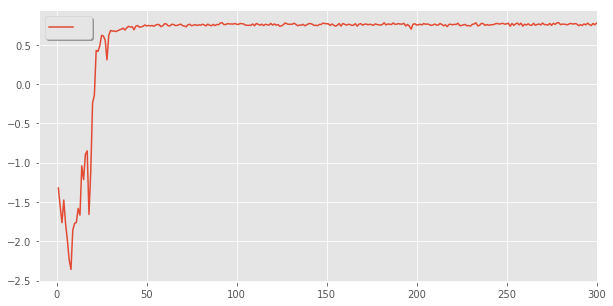

In [5]:
plot_list=[['a2c_basic_t3m','episode_means/reward']]
get_plot(plot_list, xlims=(-10,300))

### A2C - Corridor

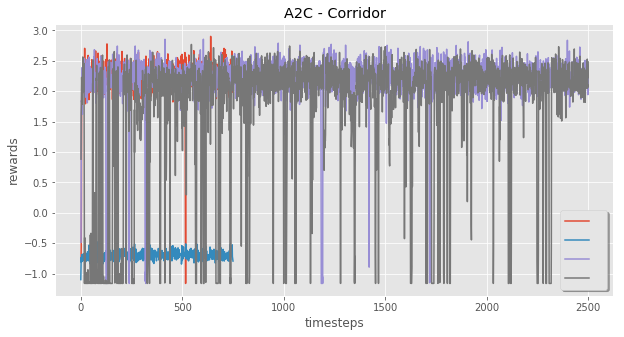

In [6]:
plot_list = [['a2c_corridor_t3m','episode_means/reward'],
             ['a2c_corridor_t3m_ew0.5','episode_means/reward'],
             ['a2c_corridor_t3m_lr0.003','episode_means/reward'],
             ['a2c_corridor_t10m_lr0.007','episode_means/reward']
            ]
get_plot(plot_list, title='A2C - Corridor', xlabel='timesteps', ylabel='rewards')

### A2C - DefendCenter

In [7]:
get_experiments('a2c_defend_center', exclude='baseline')

['a2c_defend_center_t3m',
 'a2c_defend_center_t20m_sm-eps-0.01',
 'a2c_defend_center_t3m_ew0.005',
 'a2c_defend_center_t12m',
 'a2c_defend_center_t20m_sm-cat',
 'a2c_defend_center_t20m_sm-eps-0.05']

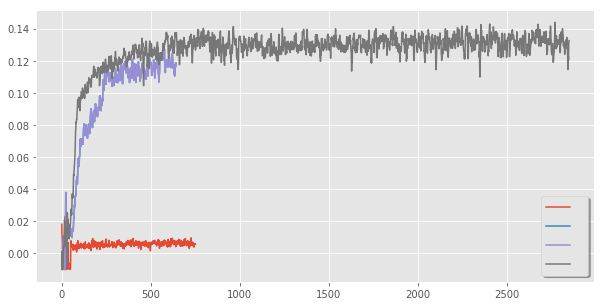

In [8]:
plot_list = [['a2c_defend_center_t3m','episode_means/reward'],
             ['a2c_defend_center_t20m_sm-eps-0.01','episode_means/reward'],
             ['a2c_defend_center_t20m_sm-eps-0.01','episode_means/reward'],
             ['a2c_defend_center_t20m_sm-eps-0.05','episode_means/reward']
            ]
get_plot(plot_list)

### A2C - HealthGathering

In [9]:
get_experiments('a2c_health_gathering', exclude = 'baseline')

['a2c_health_gathering_t3m_d0.9',
 'a2c_health_gathering_t3m',
 'a2c_health_gathering_t12m_lr0.003_d0.9',
 'a2c_health_gathering_t12m_lr0.003']

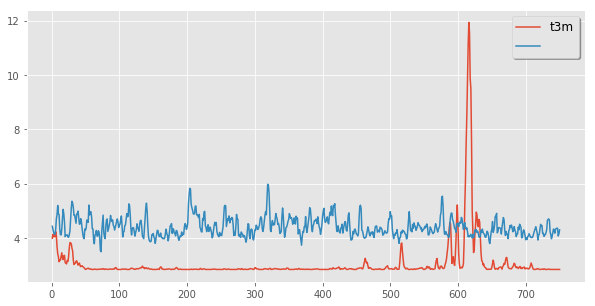

In [10]:
plot_list = [['a2c_health_gathering_t3m','episode_means/reward', 't3m'],
             ['a2c_health_gathering_t3m_d0.9','episode_means/reward']]
             
get_plot(plot_list)

#get_plot('a2c_health_gathering_t12m_lr0.003','episode_means/reward')
#get_plot('a2c_health_gathering_t12m_lr0.003_d0.9','episode_means/reward')

### Baseline A2C - Basic

In [11]:
fpath = get_path('baseline_a2c_basic_t5m_lr0.001_bs256')
get_data_tags(fpath)

['nupdates',
 'total_timesteps',
 'fps',
 'policy_entropy',
 'value_loss',
 'explained_variance',
 'eprewmean',
 'eplenmean']

In [12]:
get_experiments('baseline_a2c_basic')

['baseline_a2c_basic_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4',
 'baseline_a2c_basic_t5m_lr0.001_bs256',
 'baseline_a2c_basic_t5m_lr00025_bs80_ne16_sc4',
 'baseline_a2c_basic_t5m_lr0.00025_bs80_ne16']

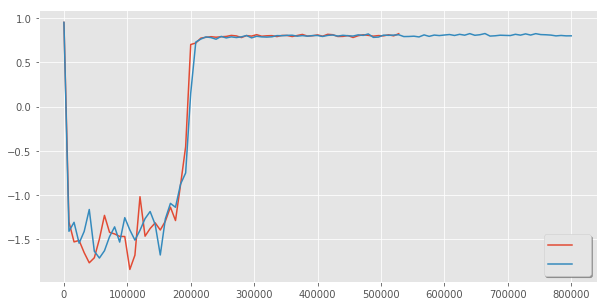

In [13]:
plot_list = [['baseline_a2c_basic_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4','eprewmean'],
             #['baseline_a2c_basic_t5m_lr0.001_bs256','eprewmean'],
             ['baseline_a2c_basic_t5m_lr00025_bs80_ne16_sc4','eprewmean']]
             #['baseline_a2c_basic_t5m_lr0.00025_bs80_ne16','eprewmean']]
get_plot(plot_list, x_data='total_timesteps')

### Baseline A2C - Corridor

In [14]:
get_experiments('baseline_a2c_corridor')

['baseline_a2c_corridor_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4',
 'baseline_a2c_corridor_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4']

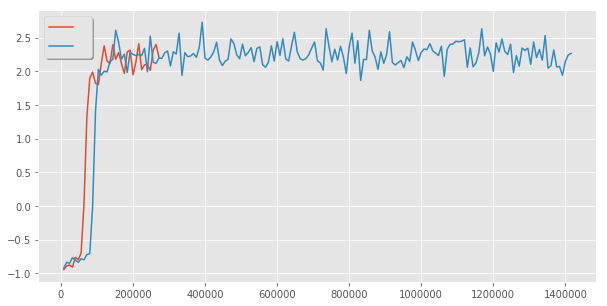

In [15]:
plot_list = [['baseline_a2c_corridor_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4', 'eprewmean'],
             ['baseline_a2c_corridor_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4','eprewmean']]
get_plot(plot_list, x_data='total_timesteps')

### Baseline A2C - DefendCenter

In [16]:
get_experiments('baseline_a2c_defend_center')

['baseline_a2c_defend_center_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4',
 'baseline_a2c_defend_center_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4']

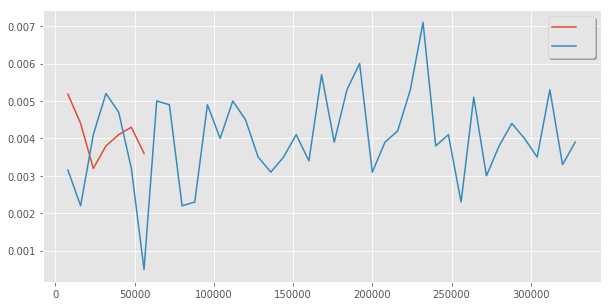

In [17]:
plot_list = [['baseline_a2c_defend_center_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4','eprewmean'],
             ['baseline_a2c_defend_center_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4','eprewmean']]
get_plot(plot_list, x_data='total_timesteps')

### Baseline A2C - HealthGathering

In [18]:
get_experiments('baseline_a2c_health_gathering')

['baseline_a2c_health_gathering_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4',
 'baseline_a2c_health_gathering_supreme_1',
 'baseline_a2c_health_gathering_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4',
 'baseline_a2c_health_gathering_supreme_2']

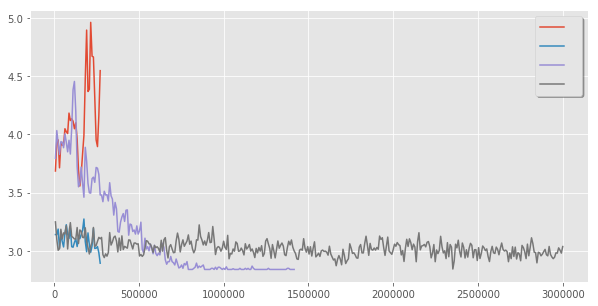

In [19]:
plot_list = [['baseline_a2c_health_gathering_t5m_lr0.00025_bs80_ne16_sc4_dr3_g_fs4','eprewmean'],
             ['baseline_a2c_health_gathering_supreme_1','eprewmean'],
             ['baseline_a2c_health_gathering_t3m_lr0.0001_bs80_ne8_sc4_dr3_g_fs4','eprewmean'],
             ['baseline_a2c_health_gathering_supreme_2','eprewmean']]
get_plot(plot_list, x_data='total_timesteps')

### Baseline PPO2 - Basic

In [20]:
fpath = get_path('baseline_ppo2_Basic_ns1024')
get_data_tags(fpath)

['misc/serial_timesteps',
 'misc/nupdates',
 'misc/total_timesteps',
 'fps',
 'misc/explained_variance',
 'eprewmean',
 'eplenmean',
 'misc/time_elapsed',
 'loss/policy_loss',
 'loss/value_loss',
 'loss/policy_entropy',
 'loss/approxkl',
 'loss/clipfrac']

In [21]:
get_experiments('baseline_ppo2_Basic')

['baseline_ppo2_Basic_ns2048',
 'baseline_ppo2_Basic_ns4096',
 'baseline_ppo2_Basic_ns1024']

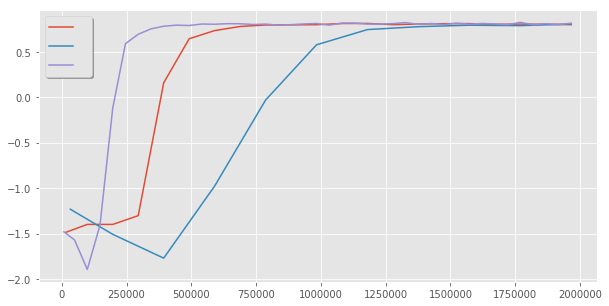

In [22]:
plot_list = [['baseline_ppo2_Basic_ns2048','eprewmean'],
             ['baseline_ppo2_Basic_ns4096','eprewmean'],
             ['baseline_ppo2_Basic_ns1024','eprewmean']]
get_plot(plot_list, x_data='misc/total_timesteps')

## A2C vs. A2C Baseline

In [23]:
a2c_rewards, a2c_steps = get_data_list('a2c_basic_t3m','episode_means/reward')
baseline_rewards, _ = get_data_list('baseline_a2c_ns_5_ne8', 'eprewmean')
baseline_steps, _ = get_data_list('baseline_a2c_ns_5_ne8', 'total_timesteps')

#baseline_rewards, _ = get_data_list('Basic_Test_new_ne16', 'eprewmean')
#baseline_steps, _ = get_data_list('Basic_Test_new_ne16', 'total_timesteps')

In [24]:
baseline_rewards

[0.949999988079071,
 -1.413218379020691,
 -1.5343999862670898,
 -1.5880000591278076,
 -1.5408999919891357,
 -1.3380000591278076,
 -1.1898000240325928,
 -1.6166000366210938,
 -1.242300033569336,
 -1.4718999862670898,
 -1.3387000560760498,
 -1.0743999481201172,
 -1.4581999778747559,
 -1.962399959564209,
 -1.631100058555603,
 -1.4023000001907349,
 -1.6825000047683716,
 -1.7109999656677246,
 -1.577299952507019,
 -1.6270999908447266,
 -1.563099980354309,
 -1.1060999631881714,
 -1.2656999826431274,
 -1.7867000102996826,
 -1.416700005531311,
 -1.8202999830245972,
 -1.892199993133545,
 -1.4000999927520752,
 -1.6582000255584717,
 -1.4428000450134277,
 -1.4449000358581543,
 -1.3580000400543213,
 -1.9134000539779663,
 -1.718400001525879,
 -1.6597000360488892,
 -1.4702999591827393,
 -1.8105000257492065,
 -1.6473000049591064,
 -1.3351999521255493,
 -1.6675000190734863,
 -1.1414999961853027,
 -1.0262999534606934,
 -1.6519999504089355,
 -1.497499942779541,
 -1.391700029373169,
 -1.6344000101089478,
 

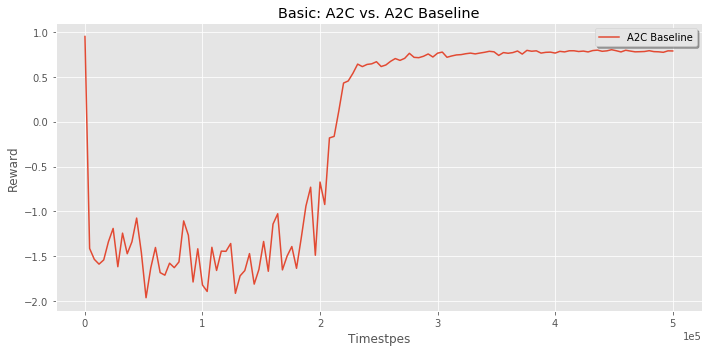

In [25]:
plt.rcParams["figure.figsize"] = (10,5)
#plt.plot(a2c_steps, a2c_rewards, label='A2C')
plt.plot(baseline_steps, baseline_rewards, label='A2C Baseline')

#plt.ylim((-2.5,1))
#plt.xlim(0,400000)

plt.title('Basic: A2C vs. A2C Baseline')
plt.xlabel('Timestpes')
plt.ylabel('Reward')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.legend(shadow=True)
plt.savefig('plots/A2C_vs_A2C_Baseline', dpi=130)

## Health Gathering: A2C vs PPO2

In [26]:
a2c_rewards, a2c_steps = get_data_list('a2c_HealthGathering_ep05', 'episode_means/reward')
ppo_rewards, _ = get_data_list('baseline_ppo2_HealthGathering_ns1024', 'eprewmean')
ppo_steps, _ = get_data_list('baseline_ppo2_HealthGathering_ns1024', 'misc/total_timesteps')

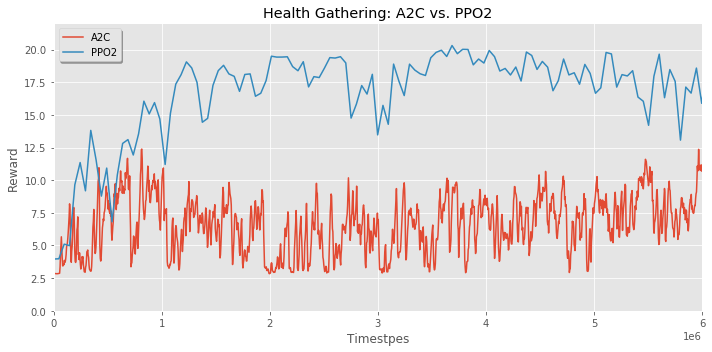

In [27]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(a2c_steps, a2c_rewards, label='A2C')
plt.plot(ppo_steps, ppo_rewards, label='PPO2')

plt.ylim((0,22))
plt.xlim(0,min(max(a2c_steps),max(ppo_steps)))

plt.title('Health Gathering: A2C vs. PPO2')
plt.xlabel('Timestpes')
plt.ylabel('Reward')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.legend(shadow=True)
plt.savefig('plots/HealthGathering_A2C_vs_PPO2', dpi=130)

## Deadly Corridor: A2C vs PPO2

In [28]:
a2c_rewards, a2c_steps = get_data_list('a2c_Corridor_ep1', 'episode_means/reward')
ppo_rewards, _ = get_data_list('baseline_ppo2_Corridor_ns1024', 'eprewmean')
ppo_steps, _ = get_data_list('baseline_ppo2_Corridor_ns1024', 'misc/total_timesteps')

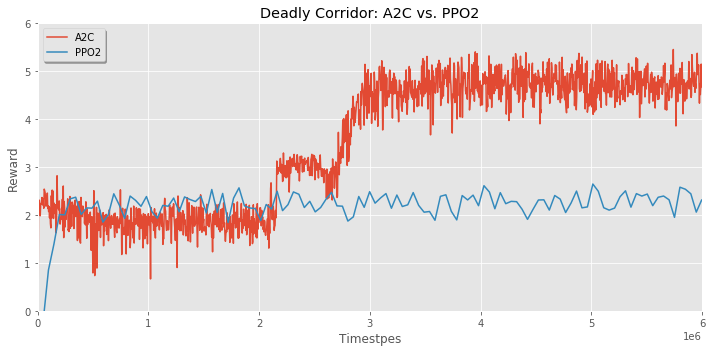

In [29]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(a2c_steps, a2c_rewards, label='A2C')
plt.plot(ppo_steps, ppo_rewards, label='PPO2')

plt.ylim((0,6))
plt.xlim(0,min(max(a2c_steps),max(ppo_steps)))

plt.title('Deadly Corridor: A2C vs. PPO2')
plt.xlabel('Timestpes')
plt.ylabel('Reward')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(shadow=True)
plt.tight_layout()
plt.savefig('plots/Corridor_A2C_vs_PPO2', dpi=130)

## Basic: A2C vs. PPO2

In [30]:
a2c_rewards, a2c_steps = get_data_list('a2c_basic_t3m', 'episode_means/reward')
ppo_rewards, _ = get_data_list('baseline_ppo2_Basic_ns1024', 'eprewmean')
ppo_steps, _ = get_data_list('baseline_ppo2_Basic_ns1024', 'misc/total_timesteps')

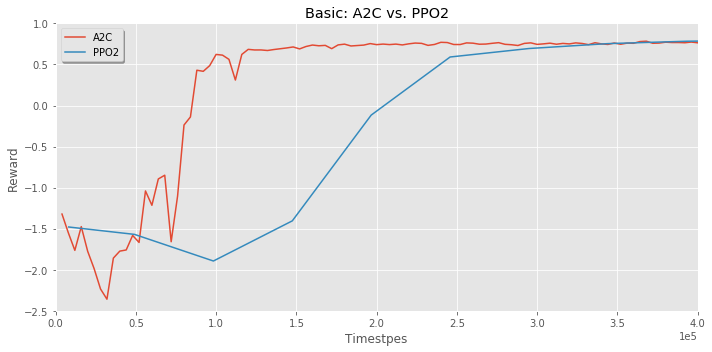

In [31]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(a2c_steps, a2c_rewards, label='A2C')
plt.plot(ppo_steps, ppo_rewards, label='PPO2')

plt.ylim((-2.5,1))
plt.xlim(0,400000)

plt.title('Basic: A2C vs. PPO2')
plt.xlabel('Timestpes')
plt.ylabel('Reward')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.legend(shadow=True)
plt.tight_layout()
plt.savefig('plots/Basic_A2C_vs_PPO2', dpi=130)

## Defend Center: A2C vs. PPO2

In [32]:
a2c_rewards, a2c_steps = get_data_list('a2c_defend_center_t20m_sm-eps-0.05', 'episode_means/reward')
ppo_rewards, _ = get_data_list('baseline_ppo2_DefendCenter_ns1024', 'eprewmean')
ppo_steps, _ = get_data_list('baseline_ppo2_DefendCenter_ns1024', 'misc/total_timesteps')

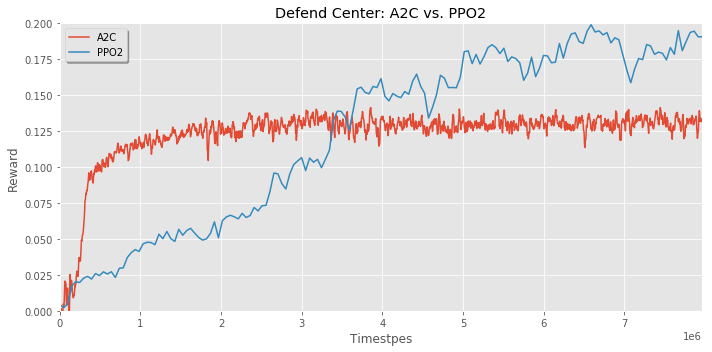

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(a2c_steps, a2c_rewards, label='A2C')
plt.plot(ppo_steps, ppo_rewards, label='PPO2')

plt.ylim((0,0.2))
plt.xlim(0,min(max(a2c_steps),max(ppo_steps)))

plt.title('Defend Center: A2C vs. PPO2')
plt.xlabel('Timestpes')
plt.ylabel('Reward')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.legend(shadow=True)
plt.tight_layout()
plt.savefig('plots/DefendCenter_A2C_vs_PPO2', dpi=130)